<a href="https://colab.research.google.com/github/savadsvd/opencv/blob/master/object_detection_efficientdet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Efficientdet is a single shot object detector like SSD.Efficientdet models are pre_trained on the common objects in context(COCO)image database

In [ ]:
import tensorflow_hub as hub   #library containing pre-trained models,
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
width=720
height=720
image=cv2.imread('/content/drive/MyDrive/data/parking.jpg')
img=cv2.resize(image,(width,height))

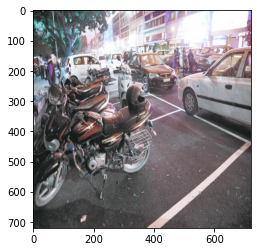

In [ ]:
plt.imshow(img)

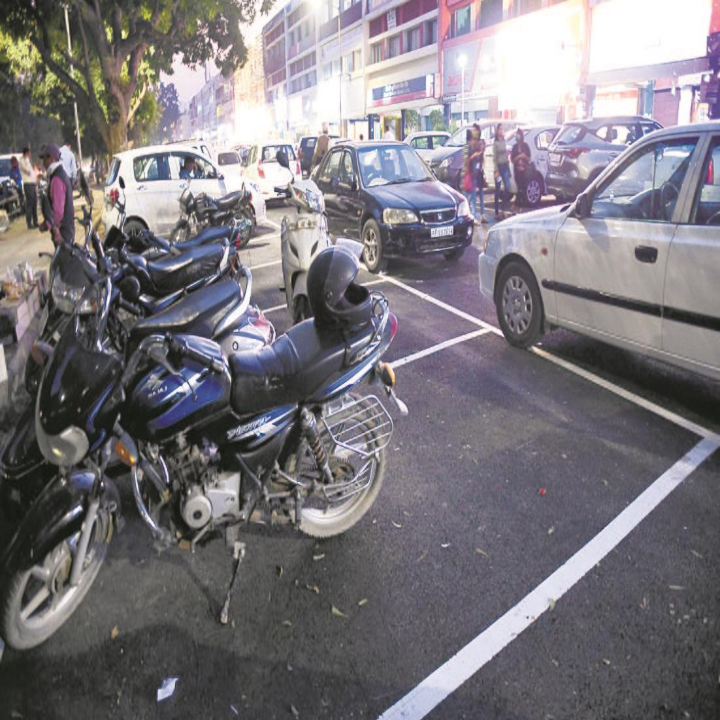

In [ ]:
from  google.colab.patches import cv2_imshow
cv2_imshow(img)

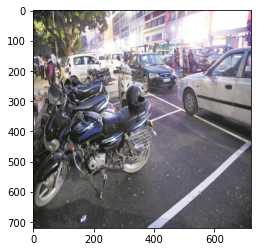

In [ ]:
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

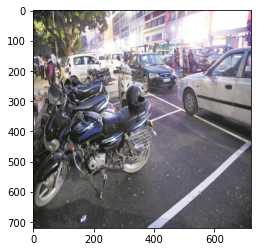

In [ ]:
rgb_tensor=tf.convert_to_tensor(rgb,dtype=tf.uint8)  #convert image to sensor
plt.imshow(rgb_tensor)

In [ ]:
print(rgb_tensor.shape)
rgb_tensor=tf.expand_dims(rgb_tensor,0)
print(rgb_tensor.shape)

(720, 720, 3)
(1, 720, 720, 3)


In [ ]:
detector=hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/data/labels.csv',sep=';',index_col='ID')

In [ ]:
labels.head()

,OBJECT (PAPER),OBJECT (2014 REL.),OBJECT (2017 REL.),SUPER CATEGORY
ID,,,,
1,person,person,person,person
2,bicycle,bicycle,bicycle,vehicle
3,car,car,car,vehicle
4,motorcycle,motorcycle,motorcycle,vehicle
5,airplane,airplane,airplane,vehicle


In [ ]:
print(labels.columns)
labels=labels['OBJECT (2017 REL.)']

Index(['OBJECT (PAPER)', 'OBJECT (2014 REL.)', 'OBJECT (2017 REL.)',
       'SUPER CATEGORY'],
      dtype='object')


In [ ]:
#boxes:ymin,xmin,ymax,xmax
boxes,scores,classes,num_detections=detector(rgb_tensor)

In [ ]:
num_detections

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100], dtype=int32)>

In [ ]:
boxes

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[2.24729507e+02, 4.89835739e+00, 6.62686890e+02, 4.13882721e+02],
        [1.36000458e+02, 3.04387817e+02, 2.70701691e+02, 4.75733459e+02],
        [1.21389503e+02, 4.80233673e+02, 4.41972992e+02, 7.19814392e+02],
        [1.41656662e+02, 4.19088631e+01, 2.46398026e+02, 8.06648483e+01],
        [1.48623932e+02, 1.59190845e+01, 2.31191208e+02, 4.57438812e+01],
        [1.45664444e+02, 1.00009819e+02, 2.41181427e+02, 2.39650040e+02],
        [1.42775208e+02, 2.41008835e+02, 2.03877975e+02, 3.01144226e+02],
        [1.16792572e+02, 5.29336731e+02, 2.03278961e+02, 6.59739319e+02],
        [1.31056488e+02, 4.03311859e+02, 1.73440292e+02, 4.61503510e+02],
        [1.28511230e+02, 4.59538239e+02, 2.18494492e+02, 4.87622314e+02],
        [2.10140610e+02, 8.34252777e+01, 3.43282013e+02, 2.60017303e+02],
        [1.26138245e+02, 4.87800110e+02, 2.09654327e+02, 5.12744690e+02],
        [1.30035446e+02, 5.09099213e+02, 2.09589706e+02, 5.

In [ ]:
classes

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 4.,  3.,  3.,  1.,  1.,  3.,  3.,  3.,  3.,  1.,  4.,  1.,  1.,
         4.,  3.,  4.,  1.,  4.,  3.,  1.,  3.,  1.,  6.,  3.,  1.,  1.,
         4.,  3.,  3.,  3.,  4.,  1.,  3.,  1.,  3.,  1.,  1.,  3.,  1.,
         1.,  3.,  3.,  1.,  1.,  4.,  1.,  3.,  1.,  3.,  4.,  3.,  1.,
         4.,  1.,  1.,  1., 10.,  1.,  3.,  1.,  3.,  4.,  1.,  1.,  1.,
         4.,  3.,  3.,  1.,  1.,  3.,  1.,  1.,  4.,  1.,  1.,  1.,  4.,
         1.,  1.,  4.,  3.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  3.,  4.,
         1.,  4.,  1.,  4., 10.,  1.,  1.,  8.,  1.]], dtype=float32)>

In [ ]:
scores

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.76149225, 0.7422571 , 0.67247164, 0.52233106, 0.51411444,
        0.4897227 , 0.48390123, 0.46501866, 0.42438152, 0.40583065,
        0.39678684, 0.34649378, 0.31793028, 0.24491915, 0.23419362,
        0.2113478 , 0.20504278, 0.20473221, 0.19282791, 0.19129914,
        0.18700787, 0.18245164, 0.17519452, 0.17283817, 0.15925938,
        0.1499316 , 0.14942545, 0.1456471 , 0.13977246, 0.13669588,
        0.13569821, 0.13213569, 0.11937573, 0.11771793, 0.11720113,
        0.11522418, 0.11240748, 0.10946976, 0.10813496, 0.10790479,
        0.10789911, 0.10759454, 0.10707262, 0.10660608, 0.10466286,
        0.10334273, 0.10281089, 0.10157535, 0.10041987, 0.09746324,
        0.09347064, 0.09226143, 0.0919197 , 0.09090555, 0.08940314,
        0.08769066, 0.08660588, 0.08619552, 0.08534504, 0.08383796,
        0.08340666, 0.08261006, 0.08224894, 0.08082179, 0.08030723,
        0.0801254 , 0.07800514, 0.07749575, 0.07707158, 0.07524316

In [ ]:
pred_labels=classes.numpy().astype('int')[0]  #covert 'classes from tensor to numpy array
pred_labels=[labels[i] for i in pred_labels]
pred_boxes=boxes.numpy()[0].astype('int')
pred_scores=scores.numpy()[0]

In [ ]:
pred_boxes

array([[224,   4, 662, 413],
       [136, 304, 270, 475],
       [121, 480, 441, 719],
       [141,  41, 246,  80],
       [148,  15, 231,  45],
       [145, 100, 241, 239],
       [142, 241, 203, 301],
       [116, 529, 203, 659],
       [131, 403, 173, 461],
       [128, 459, 218, 487],
       [210,  83, 343, 260],
       [126, 487, 209, 512],
       [130, 509, 209, 540],
       [172,   0, 231,  19],
       [147, 213, 192, 244],
       [171, 273, 326, 331],
       [150,   6, 215,  30],
       [186, 106, 304, 255],
       [130, 297, 175, 355],
       [157,  79, 249, 112],
       [142, 417, 180, 463],
       [149, 554, 201, 584],
       [ 97, 361, 141, 446],
       [114, 569, 147, 663],
       [145,  29, 234,  62],
       [130, 469, 195, 490],
       [187, 167, 246, 256],
       [124, 507, 192, 565],
       [129, 434, 146, 456],
       [143, 254, 184, 299],
       [218,  14, 439, 262],
       [142,  56, 203,  82],
       [153,   4, 175,  19],
       [156, 180, 177, 200],
       [140, 3

In [ ]:
pred_labels

['motorcycle',
 'car',
 'car',
 'person',
 'person',
 'car',
 'car',
 'car',
 'car',
 'person',
 'motorcycle',
 'person',
 'person',
 'motorcycle',
 'car',
 'motorcycle',
 'person',
 'motorcycle',
 'car',
 'person',
 'car',
 'person',
 'bus',
 'car',
 'person',
 'person',
 'motorcycle',
 'car',
 'car',
 'car',
 'motorcycle',
 'person',
 'car',
 'person',
 'car',
 'person',
 'person',
 'car',
 'person',
 'person',
 'car',
 'car',
 'person',
 'person',
 'motorcycle',
 'person',
 'car',
 'person',
 'car',
 'motorcycle',
 'car',
 'person',
 'motorcycle',
 'person',
 'person',
 'person',
 'traffic light',
 'person',
 'car',
 'person',
 'car',
 'motorcycle',
 'person',
 'person',
 'person',
 'motorcycle',
 'car',
 'car',
 'person',
 'person',
 'car',
 'person',
 'person',
 'motorcycle',
 'person',
 'person',
 'person',
 'motorcycle',
 'person',
 'person',
 'motorcycle',
 'car',
 'person',
 'person',
 'person',
 'person',
 'person',
 'motorcycle',
 'person',
 'car',
 'motorcycle',
 'person',


In [ ]:
for score,(ymin,xmin,ymax,xmax),label in zip(pred_scores,pred_boxes,pred_labels):
  if score<0.5:
    continue
  score_txt=f'{100*round(score)}%'
  img_boxes=cv2.rectangle(rgb,(xmin,ymax),(xmax,ymin),(0,255,0),2)
  font=cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(img_boxes,label,(xmin,ymax-10),font,1,(255,255,255),2,cv2.LINE_AA)
  cv2.putText(img_boxes,score_txt,(xmax,ymax-10),font,1,(255,255,255),2,cv2.LINE_AA)


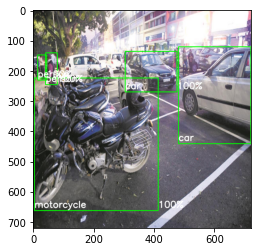

In [ ]:
plt.imshow(img_boxes)

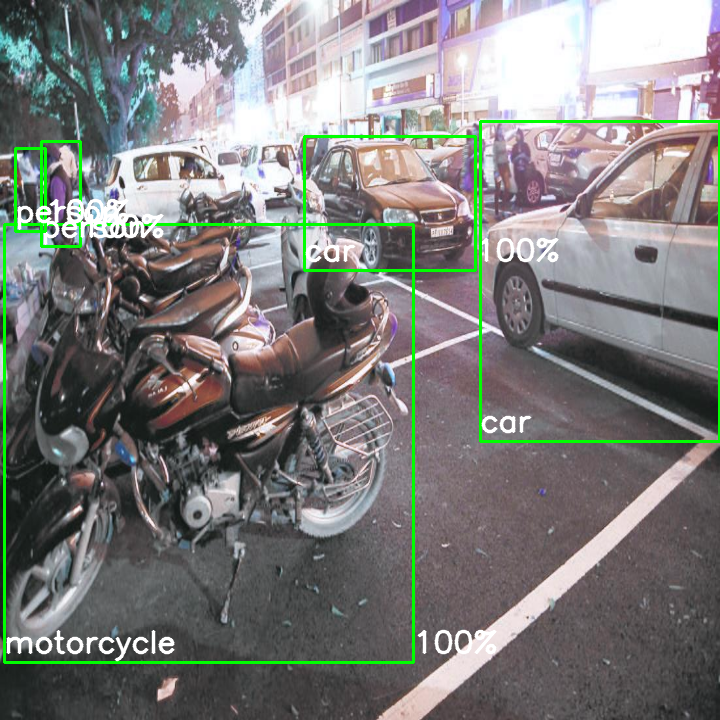

In [ ]:
from  google.colab.patches import cv2_imshow
cv2_imshow(img_boxes)